# Detailed Evaluation

This notebook shows how to produce some tables and plots for analysing results. This is meant as a starting point, because eah game will require a custom evaluation depending on its metrics and experiments.

This notebook uses the output files of evaluation/bencheval.py. Run that first.

In [25]:
import sys
sys.path.append('..')

from pathlib import Path

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from matplotlib.colors import ListedColormap
from matplotlib.patches import Polygon

import evaluation.evalutils as utils
from evaluation.makingtables import build_dispersion_table
import clemgame.metrics as clemmetrics

Choose path for the .csv with the raw scores. This is created after running ```bencheval.py```.

In [26]:
RAW_PATH = Path('../results/raw.csv')
raw_df = pd.read_csv(RAW_PATH, index_col=0)

Let's inspect the contents of ```data```:

In [27]:
# raw_df = raw_df[raw_df.experiment=='0_full_game_4p']
raw_df

,game,model,experiment,episode,metric,value
0,wizardsapprentice,Mixtral-8x22B-Instruct-v0.1-t0.0--custom-t0.0-...,0_full_game_4p,episode_0,Aborted,0.000000
1,wizardsapprentice,Mixtral-8x22B-Instruct-v0.1-t0.0--custom-t0.0-...,0_full_game_4p,episode_0,Request Count,36.000000
2,wizardsapprentice,Mixtral-8x22B-Instruct-v0.1-t0.0--custom-t0.0-...,0_full_game_4p,episode_0,Parsed Request Count,36.000000
3,wizardsapprentice,Mixtral-8x22B-Instruct-v0.1-t0.0--custom-t0.0-...,0_full_game_4p,episode_0,Violated Request Count,0.000000
4,wizardsapprentice,Mixtral-8x22B-Instruct-v0.1-t0.0--custom-t0.0-...,0_full_game_4p,episode_0,Request Success Ratio,1.000000
5,wizardsapprentice,Mixtral-8x22B-Instruct-v0.1-t0.0--custom-t0.0-...,0_full_game_4p,episode_0,Lose,0.000000
6,wizardsapprentice,Mixtral-8x22B-Instruct-v0.1-t0.0--custom-t0.0-...,0_full_game_4p,episode_0,Success,1.000000
7,wizardsapprentice,Mixtral-8x22B-Instruct-v0.1-t0.0--custom-t0.0-...,0_full_game_4p,episode_0,Main Score,44.444444
8,wizardsapprentice,Mixtral-8x22B-Instruct-v0.1-t0.0--programmatic...,0_full_game_4p,episode_0,Aborted,0.000000
9,wizardsapprentice,Mixtral-8x22B-Instruct-v0.1-t0.0--programmatic...,0_full_game_4p,episode_0,Request Count,37.000000


If we want to evaluate a single game and the results directory contained more games, we can filter the game column:

In [19]:
# game_df = raw_df[raw_df.game == 'privateshared']
# game_df

## Overview tables

Get dispersion metrics over all episodes. Note that we use groupby, which will ignore NaN values, according to the documentation!

In [28]:
stats_df = build_dispersion_table(['game', 'model', 'metric'], raw_df) # could also use raw_df for results for all games
stats_df

mean   
game              model                                              metric                              
wizardsapprentice Llama-3-70B-Instruct-Anyscale-t0.0--custom-t0.0... Aborted                  0.000000  \
                                                                     Lose                     0.000000   
                                                                     Main Score              50.000000   
                                                                     Parsed Request Count    36.000000   
                                                                     Played                   1.000000   
                                                                     Request Count           36.000000   
                                                                     Request Success Ratio    1.000000   
                                                                     Success                  1.000000   
                                                                     Violated Request Count   0.000000   
                  Llama-3-70B-Instruct-Anyscale-t0.0--programmati... Aborted                  0.000000   
                                                                     Lose                     1.000000   
                                                                     Main Score              50.000000   
                                                                     Parsed Request Count    36.000000   
                                                                     Played                   1.000000   
                                                                     Request Count           36.000000   
                                                                     Request Success Ratio    1.000000   
                                                                     Success                  0.000000   
                                                                     Violated Request Count   0.000000   
                  Mixtral-8x22B-Instruct-v0.1-t0.0--custom-t0.0--... Aborted                  0.000000   
                                                                     Lose                     0.000000   
                                                                     Main Score              44.444444   
                                                                     Parsed Request Count    36.000000   
                                                                     Played                   1.000000   
                                                                     Request Count           36.000000   
                                                                     Request Success Ratio    1.000000   
                                                                     Success                  1.000000   
                                                                     Violated Request Count   0.000000   
                  Mixtral-8x22B-Instruct-v0.1-t0.0--programmatic-... Aborted                  0.000000   
                                                                     Lose                     0.000000   
                                                                     Main Score              44.444444   
                                                                     Parsed Request Count    36.000000   
                                                                     Played                   1.000000   
                                                                     Request Count           37.000000   
                                                                     Request Success Ratio    0.972973   
                                                                     Success                  1.000000   
                                                                     Violated Request Count   1.000000   

                                                                     

Break results down by experiment:

In [21]:
detailed_stats_df = build_dispersion_table(['game', 'model', 'experiment', 'metric'], raw_df) # could also use raw_df for results for all games
detailed_stats_df

mean   
game              model                                              experiment     metric                              
wizardsapprentice Llama-3-70B-Instruct-Anyscale-t0.0--Mixtral-8x2... 0_full_game_4p Aborted                  0.000000  \
                                                                                    Lose                     0.000000   
                                                                                    Main Score              50.000000   
                                                                                    Parsed Request Count    36.000000   
                                                                                    Played                   1.000000   
...                                                                                                               ...   
                  Mixtral-8x22B-Instruct-v0.1-t0.0--programmatic-... 0_full_game_4p Played                   1.000000   
                                                                                    Request Count           37.000000   
                                                                                    Request Success Ratio    0.972973   
                                                                                    Success                  1.000000   
                                                                                    Violated Request Count   1.000000   

                                                                                                            std   
game              model                                              experiment     metric                        
wizardsapprentice Llama-3-70B-Instruct-Anyscale-t0.0--Mixtral-8x2... 0_full_game_4p Aborted                 NaN  \
                                                                                    Lose                    NaN   
                                                                                    Main Score              NaN   
                                                                                    Parsed Request Count    NaN   
                                                                                    Played                  NaN   
...                                                                                                         ...   
                  Mixtral-8x22B-Instruct-v0.1-t0.0--programmatic-... 0_full_game_4p Played                  NaN   
                                                                                    Request Count           NaN   
                                                                                    Request Success Ratio   NaN   
                                                                                    Success                 NaN   
                                                                                    Violated Request Count  NaN   

                                                                                                            var   
game              model                                              experiment     metric                        
wizardsapprentice Llama-3-70B-Instruct-Anyscale-t0.0--Mixtral-8x2... 0_full_game_4p Aborted                 NaN  \
                                                                                    Lose                    NaN   
                                                                                    Main Score              NaN   
                                                                                    Parsed Request Count    NaN   
                                                                                    Played                  NaN   
...                                                                                                         ...   
                  Mixtral-8x22B-Instruct-v0.1-t0.0--programmatic-... 0_full_game_4p Played                  NaN   
        

To save the table, call ```to_csv```, ```to_html``` and/or ```to_latex``` (there are also other formats and customization options, check the pandas docs):

In [29]:
stats_df.to_csv('../results/stats.csv')

## Basic Plots

Plots can of course be created with ```matplotlib``` directly, but ```seaborn``` makes it very easy to work with pandas dataframes. Let's create a barplot with an overview by model and experiment:

In [30]:
# choose a metric
METRIC = 'Main Score'
metric_df = raw_df[raw_df.metric == METRIC].sort_values('experiment')
metric_df

,game,model,experiment,episode,metric,value
7,wizardsapprentice,Mixtral-8x22B-Instruct-v0.1-t0.0--custom-t0.0-...,0_full_game_4p,episode_0,Main Score,44.444444
15,wizardsapprentice,Mixtral-8x22B-Instruct-v0.1-t0.0--programmatic...,0_full_game_4p,episode_0,Main Score,44.444444
23,wizardsapprentice,Llama-3-70B-Instruct-Anyscale-t0.0--custom-t0....,0_full_game_4p,episode_0,Main Score,50.000000
31,wizardsapprentice,Llama-3-70B-Instruct-Anyscale-t0.0--programmat...,0_full_game_4p,episode_0,Main Score,50.000000


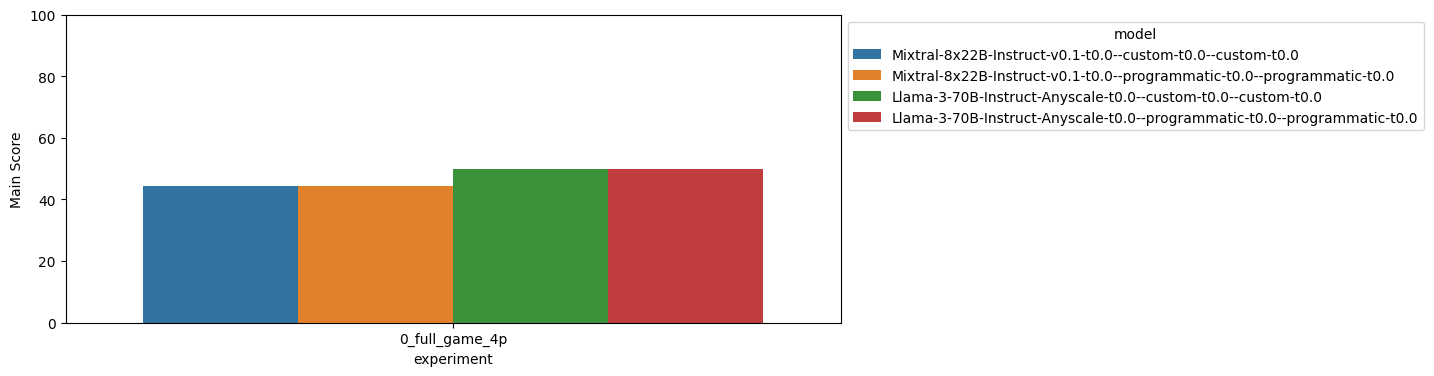

In [31]:
# change the figure size according to your needs
fig, ax = plt.subplots(figsize=(10, 4))

# choose what goes in each axis and legend according to your needs
# you can also e.g. swap y and hue, to get games in the legend and models in the axis
g = sns.barplot(metric_df,
                x='experiment',
                y='value',
                hue='model', 
                ax=ax)

# customize plot details according to your needs
sns.move_legend(g, "upper left", bbox_to_anchor=(1, 1))
plt.ylim(0, 100)
plt.ylabel(METRIC)

plt.show()

## Benchmark plots

Reproducing Figure 10 in the paper. As more models or games are added, sizes must be adjusted accordingly:

In [32]:
# read the clem scores
RESULTS_PATH = Path('../results/results.csv')
clem_df = pd.read_csv(RESULTS_PATH, index_col=0)
clem_df

,"-, clemscore","all, Average % Played","all, Average Quality Score","wizardsapprentice, % Played","wizardsapprentice, Quality Score","wizardsapprentice, Quality Score (std)"
Llama-3-70B-Instruct-Anyscale-t0.0--custom-t0.0--custom-t0.0,50.00,100.0,50.00,100.0,50.00,NaN
Llama-3-70B-Instruct-Anyscale-t0.0--programmatic-t0.0--programmatic-t0.0,50.00,100.0,50.00,100.0,50.00,NaN
Mixtral-8x22B-Instruct-v0.1-t0.0--custom-t0.0--custom-t0.0,44.44,100.0,44.44,100.0,44.44,NaN
Mixtral-8x22B-Instruct-v0.1-t0.0--programmatic-t0.0--programmatic-t0.0,44.44,100.0,44.44,100.0,44.44,NaN


Horizontal bar plot with player, aborted, lost:

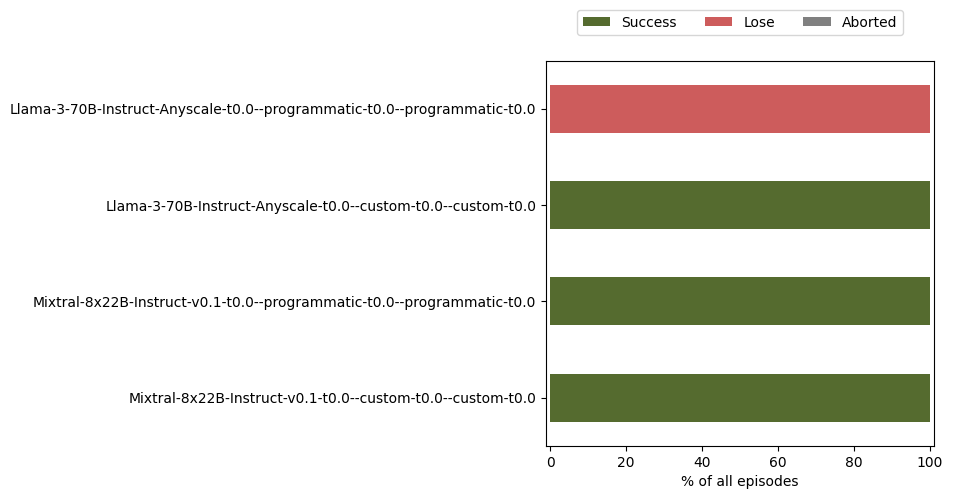

In [33]:
STACK_COLORS = ['darkolivegreen', 'indianred', 'gray']

df_aux = raw_df[raw_df.metric.isin(utils.GAMEPLAY_METRICS)]
df_aux = (df_aux.pivot(index=['game', 'model', 'experiment', 'episode'],
                       columns='metric',
                       values='value')
                .reset_index()
                .drop(columns=['game', 'experiment', 'episode'])
                .groupby('model')
                .sum()
                .sort_values(axis=1, by='metric', ascending=False))
percs = 100 * df_aux.div(df_aux.sum(axis=1), axis=0)
order = clem_df.sort_values(by='-, clemscore').index
percs = percs.reindex(order)

percs.plot(kind='barh',
           stacked=True,
           figsize=(5, 5),
           colormap=ListedColormap(STACK_COLORS))
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15), ncols=3)
plt.xlabel('% of all episodes')
plt.xlim(-1, 101)
plt.ylabel('')
plt.show()

Bar plot with the sorted clemscores (they were not sorted in the paper):

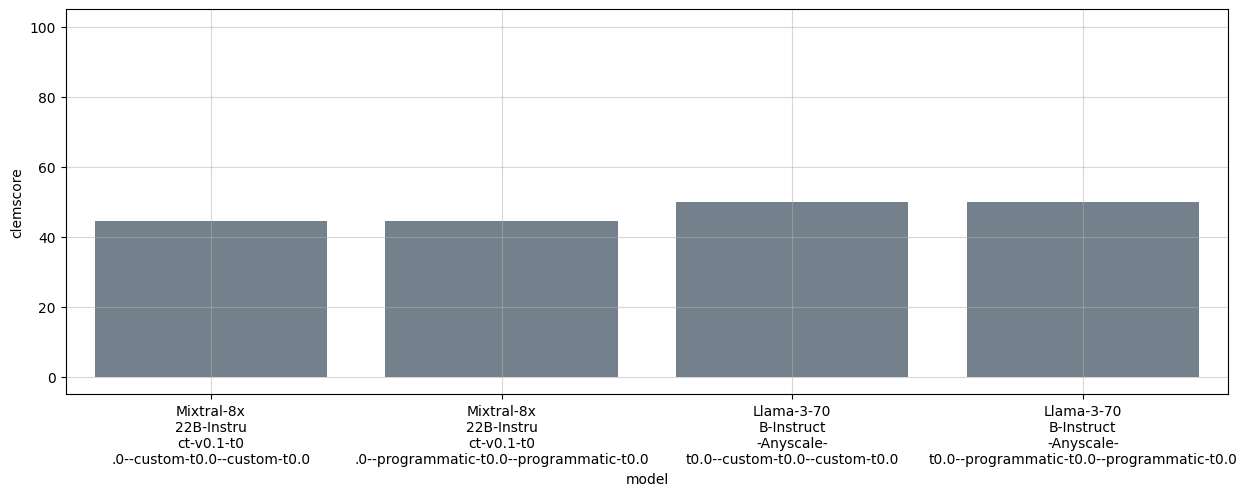

In [34]:
clem_aux = clem_df.sort_values(by='-, clemscore').reset_index(names='model')
# below is a hack to make the current names fit the plot
# ideally a dictionary with short names should be used as in the original implementation for the paper
# warning, if models have matching names up the limit, results will be wrongly merged!
clem_aux['model'] = clem_aux['model'].apply(lambda x: f'{x[:10]}\n{x[10:20]}\n{x[20:30]}\n{x[30:]}')

fig = plt.figure(figsize=(15, 5))
sns.barplot(clem_aux, x='model', y='-, clemscore', color='slategray')
plt.ylim(-5, 105)
plt.ylabel('clemscore')
plt.grid(alpha=0.5)
plt.show()

Polygons. This can get complicated if more games are added. In particular, COLUMN_ORDER must be adjusted. For more models, the number of subplots and figsize must be adjusted.

metric               game      experiment  Main Score  Played
0       wizardsapprentice  0_full_game_4p        50.0     1.0
{'x': None, 'y': None, 'hue': None, 'style': None}
       x     y                hue              style
0  100.0  50.0  wizardsapprentice  wizardsapprentice


KeyError: 'wizardsapprentice'

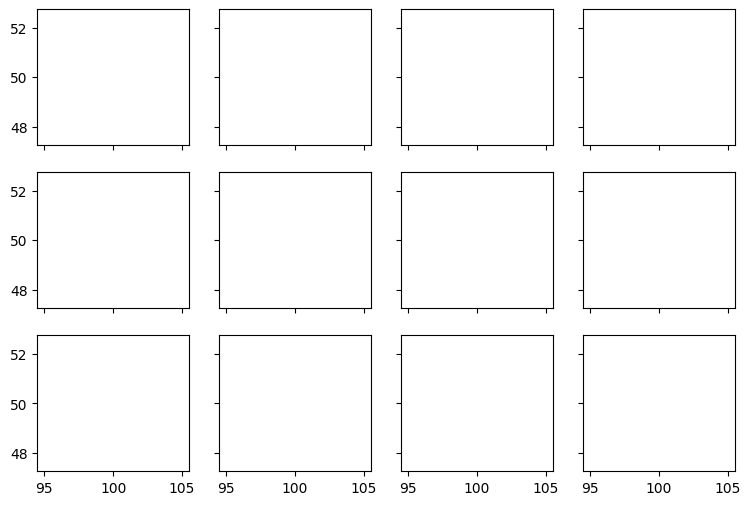

In [35]:
def ccw_sort(p):
    """Put the nodes in clockwise order."""
    # from https://stackoverflow.com/a/44143444 by user ImportanceOfBeingEarnest
    p = np.array(p)
    mean = np.mean(p, axis=0)
    d = p - mean
    s = np.arctan2(d[:, 0], d[:, 1])
    return p[np.argsort(s), :]


fig, ax_list = plt.subplots(3, 4, figsize=(9, 6), sharey=True, sharex=True)
axs = ax_list.flatten()

for n, (model, model_df) in enumerate(raw_df.groupby('model')):
    rows = model_df.metric.isin(utils.MAIN_METRICS)
    df_aux = model_df[rows]
    df_aux = (df_aux.pivot(index=['game', 'experiment', 'episode'],
                            columns='metric',
                            values='value')
                    .reset_index())
    df_aux = df_aux.drop(['episode'], axis=1)
    print(df_aux)

    # create the x and y coordinates for each game
    dots = []
    for game, game_df in df_aux.groupby('game'):
        overall_means = (game_df.mean(numeric_only=True)
                                .fillna(0))
        # replace missing score by 0 when all aborted
        played = overall_means[clemmetrics.METRIC_PLAYED] * 100
        score = overall_means[clemmetrics.BENCH_SCORE]
        dots.append((game, played, score))
    labels, played, scores = zip(*dots)

    # put them in a good order for the polygon
    edges = ccw_sort(list(zip(played, scores)))

    # create the polygon and draw it
    polygon = Polygon(edges, facecolor='lightgray')
    axs[n].add_patch(polygon)

    legend = True if n == 10 else False
    g = sns.scatterplot(x=played,
                        y=scores,
                        hue=labels,
                        style=labels,
                        hue_order=utils.COLUMN_ORDER[1:],
                        style_order=utils.COLUMN_ORDER[1:],
                        s=80,
                        ax=axs[n],
                        legend=legend)
    axs[n].set_xlim(-5, 105)
    axs[n].set_ylim(-5, 105)
    axs[n].set_ylabel('avr. quality')
    axs[n].set_xlabel('% played')
    axs[n].set_title(model, fontsize=8)

fig.legend(loc='lower right', bbox_to_anchor=(0.98, 0.08))
axs[10].legend().set_visible(False)
fig.delaxes(axs[11])
plt.tight_layout()
plt.show()